
# 파라미터 최적화 심화학습

## Step 0. 철판 제조 공정 데이터 소개 및 데이터 준비, 학습목표

**Steel Plates Faults 데이터는 1941개의 샘플을 가지며 아래의 종속변수들과 나머지 설명변수들로 구성됩니다.**

- 종속변수 (7개) - 어떠한 불량이 나타났는지를 나타내고, 다음과 같습니다.
 - Pastry, Z_Scratch, K_Scatch, Stains, Dirtiness, Bumps, Other_Faults

- 설명변수 (27개) - 철판의 길이, 반짝이는 정도, 두께, 타입 등 등 다양한 변수들을 가집니다.
 - 첫번째 칼럼 X_Minimum ~ 27번째 칼럼 SigmoidOfAreas

- 데이터출처: https://www.kaggle.com/mahsateimourikia/faults-nna/notebooks



**제조 공정 데이터의 전반적 특성**

- 제조 공정 데이터는 주로 불량률을 예측하여 불량을 일으키는 원인을 제거하거나 재고를 예측하여 수요에 맞는 생산을 진행하는 등의 목적성을 가집니다.
- 다른 데이터에 비하여 데이터를 얻는 과정이 자동화되어 있는 경우가 많아 데이터 퀄리티가 높은 편이며 결측치가 적은 경향성을 가집니다.

**아래와 같이 데이터를 준비합니다.**

In [5]:
import os
import pandas as pd 
import numpy as np

In [6]:
# 데이터를 읽어옵니다.
df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/00198/Faults.NNA",  delimiter='\t', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33
0,42,50,270900,270944,267,17,44,24220,76,108,1687,1,0,80,0.0498,0.2415,0.1818,0.0047,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,1687,1,0,80,0.7647,0.3793,0.2069,0.0036,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,1623,1,0,100,0.9710,0.3426,0.3333,0.0037,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,1353,0,1,290,0.7287,0.4413,0.1556,0.0052,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,1353,0,1,185,0.0695,0.4486,0.0662,0.0126,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0


In [7]:
# 칼럼 레이블을 읽어와서 데이터 프레임의 칼럼명으로 지정합니다.
attributes_name=pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/00198/Faults27x7_var",  delimiter=' ', header=None)
df.columns=attributes_name[0]
# 칼럼명이 제대로 지정이 되었는지 여부와 데이터 구조를 파악합니다.
df.head()
print(df.shape)

(1941, 34)


In [8]:
#Cpu의 개수를 확인합니다. 
n_cpu=os.cpu_count()
print("The number of cpus: ",n_cpu)
n_thread=n_cpu*2
print("Expected number of threads:",n_thread)

The number of cpus:  2
Expected number of threads: 4


## Step 1. 데이터 전처리 및 탐색적 데이터 분석

### 종속변수 범주화 (1) - boolean Seris로 이루어진 list 구성

- 7개의 종속변수들을 각 종속변수가 1인지 아닌지 여부를 알리는 boolean 논리 연산자로 이루어진 seris 형태로 변경합니다. 각 Seris의 길이는 1941입니다.
- 이 7개의 Seris를 list로 이어 붙여 길이 7짜리 list를 만들어 conditions라는 이름으로 저장합니다. 

In [9]:
conditions_bf=[
              df['Pastry'],
            df['Z_Scratch'],
            df['K_Scatch'],
            df['Stains'],
            df['Dirtiness'],
            df['Bumps'],
            df['Other_Faults'] 
]
conditions= list(map(lambda i: i.astype(bool), conditions_bf))
# 잘 진행되었는지 확인합니다.
choices = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']
# (문제) numpy.select를 사용하고 위에 정의해드린 choices를 인수로 활용하여 범주화를 진행합니다.
df['class']=np.select(conditions,choices)
# 아래와 같이 class 칼럼이 생성되고 범주화 된 것을 확인할 수 있습니다.
df.head()
df.isnull().sum()

0
X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Minimum_of_Luminosity    0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
TypeOfSteel_A300         0
TypeOfSteel_A400         0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
SigmoidOfAreas           0
Pastry                   0
Z_Scratch                0
K_Scatch                 0
Stains                   0
Dirtiness                0
Bumps                    0
Other_Faults             0
class                    0
dtype: int64

In [10]:
# (문제) pandas.DataFrame.describe를 활용해 기술통계량을 파악합니다.
df.describe()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
count,1941.000000,1941.000000,1.941000e+03,1.941000e+03,1941.000000,1941.000000,1941.000000,1.941000e+03,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000
mean,571.136012,617.964451,1.650685e+06,1.650739e+06,1893.878413,111.855229,82.965997,2.063121e+05,84.548686,130.193715,1459.160227,0.400309,0.599691,78.737764,0.331715,0.414203,0.570767,0.033361,0.610529,0.813472,0.575734,2.492388,1.335686,1.403271,0.083288,-0.131305,0.585420,0.081401,0.097888,0.201443,0.037094,0.028336,0.207110,0.346728
std,520.690671,497.627410,1.774578e+06,1.774590e+06,5168.459560,301.209187,426.482879,5.122936e+05,32.134276,18.690992,144.577823,0.490087,0.490087,55.086032,0.299712,0.137261,0.271058,0.058961,0.243277,0.234274,0.482352,0.788930,0.481612,0.454345,0.500868,0.148767,0.339452,0.273521,0.297239,0.401181,0.189042,0.165973,0.405339,0.476051
min,0.000000,4.000000,6.712000e+03,6.724000e+03,2.000000,2.000000,1.000000,2.500000e+02,0.000000,37.000000,1227.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.008300,0.001500,0.014400,0.048400,0.000000,0.301000,0.301000,0.000000,-0.991000,-0.998900,0.119000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,192.000000,4.712530e+05,4.712810e+05,84.000000,15.000000,13.000000,9.522000e+03,63.000000,124.000000,1358.000000,0.000000,0.000000,40.000000,0.060400,0.315800,0.361300,0.006600,0.411800,0.596800,0.000000,1.924300,1.000000,1.079200,-0.333300,-0.195000,0.248200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,435.000000,467.000000,1.204128e+06,1.204136e+06,174.000000,26.000000,25.000000,1.920200e+04,90.000000,127.000000,1364.000000,0.000000,1.000000,70.000000,0.227300,0.412100,0.555600,0.010100,0.636400,0.947400,1.000000,2.240600,1.176100,1.322200,0.095200,-0.133000,0.506300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1053.000000,1072.000000,2.183073e+06,2.183084e+06,822.000000,84.000000,83.000000,8.301100e+04,106.000000,140.000000,1650.000000,1.000000,1.000000,80.000000,0.573800,0.501600,0.818200,0.023500,0.800000,1.000000,1.000000,2.914900,1.518500,1.732400,0.511600,-0.066600,0.999800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1705.000000,1713.000000,1.298766e+07,1.298769e+07,152655.000000,10449.000000,18152.000000,1.159141e+07,203.000000,253.000000,1794.000000,1.000000,1.000000,300.000000,0.995200,0.943900,1.000000,0.875900,1.000000,1.000000,1.000000,5.183700,3.074100,4.258700,0.991700,0.642100,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Training, Test set 분리하기

In [11]:
x = df[['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300',  'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas']]
y = df['K_Scatch']

In [12]:
from sklearn.model_selection import train_test_split
from scipy.stats import zscore

In [13]:
# (문제) sklearn.model_selection.train_test_split을 활용하여, x_train, x_test, y_train, y_test로 데이터를 나눕니다
# 그 비율은 8:2로 합니다. y값에 따라 stratify하여 나눕니다.
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=1, stratify=y)

In [14]:
# (문제) pandas.DataFrame.apply를 활용하여  x_train과 x_test를 표준화합니다.
x_train = x_train.apply(zscore)
x_test = x_test.apply(zscore)

In [15]:
x_train.describe()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
count,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03
mean,-1.213233e-16,-2.146050e-19,-1.881370e-17,-2.560953e-17,-1.001490e-17,-4.138299e-17,1.087667e-17,-2.353501e-17,2.148911e-16,-6.466584e-16,4.962382e-16,3.161847e-17,4.141876e-17,7.825928e-17,-1.226467e-16,6.717135e-17,-3.912964e-17,1.362384e-16,-2.306288e-16,-2.947242e-17,2.742651e-16,1.005782e-16,-1.280476e-17,1.645305e-17,4.921607e-17,1.347719e-16
std,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00
min,-1.103367e+00,-1.241076e+00,-9.104613e-01,-9.104788e-01,-3.483794e-01,-3.406371e-01,-1.767603e-01,-3.893515e-01,-2.643140e+00,-5.071400e+00,-1.605681e+00,-8.211077e-01,-6.967596e-01,-1.123421e+00,-3.018160e+00,-2.080335e+00,-5.289097e-01,-2.468152e+00,-3.280170e+00,-1.185811e+00,-2.774003e+00,-2.156377e+00,-3.067242e+00,-2.143465e+00,-5.839974e+00,-1.367353e+00
25%,-9.883000e-01,-8.621817e-01,-6.562362e-01,-6.562372e-01,-3.333730e-01,-3.004833e-01,-1.514077e-01,-3.719521e-01,-6.554519e-01,-3.480654e-01,-7.021989e-01,-8.211077e-01,-6.967596e-01,-9.210483e-01,-7.168723e-01,-7.749740e-01,-4.443167e-01,-7.982123e-01,-9.250766e-01,-1.185811e+00,-7.146692e-01,-6.985005e-01,-6.999318e-01,-8.252854e-01,-4.361607e-01,-9.978418e-01
50%,-2.637179e-01,-2.988794e-01,-2.545875e-01,-2.546108e-01,-3.171771e-01,-2.665069e-01,-1.260551e-01,-3.538504e-01,1.675751e-01,-1.851918e-01,-6.608181e-01,-8.211077e-01,-1.413845e-01,-3.492791e-01,-1.981697e-02,-2.493327e-02,-3.870920e-01,1.006070e-01,5.824951e-01,8.913658e-01,-3.182921e-01,-3.312158e-01,-1.668921e-01,2.490715e-02,-1.325061e-02,-2.443915e-01
75%,9.307593e-01,9.199295e-01,2.919470e-01,2.919292e-01,-2.027537e-01,-8.967550e-02,-1.144025e-02,-2.343737e-01,6.567327e-01,5.205939e-01,1.311669e+00,1.217867e+00,4.374056e-02,8.284349e-01,6.595150e-01,9.383813e-01,-1.623398e-01,7.575785e-01,7.858832e-01,8.913658e-01,5.254920e-01,3.829141e-01,7.329140e-01,8.448359e-01,4.324923e-01,1.226000e+00
max,2.180122e+00,2.203231e+00,6.155444e+00,6.155404e+00,2.758779e+01,3.192762e+01,3.817116e+01,2.140560e+01,3.661558e+00,6.601209e+00,2.304809e+00,1.217867e+00,4.116492e+00,2.211034e+00,3.880404e+00,1.563140e+00,1.397465e+01,1.578793e+00,7.858832e-01,8.913658e-01,3.420237e+00,3.627366e+00,6.274553e+00,1.830314e+00,5.180199e+00,1.226589e+00


## Step 2. 로지스틱 분류 모형


### 문제 9. [로지스틱 회귀분석] 로지스틱 기본 모형 만들기

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [17]:
# (문제) 로지스틱 회귀분석 모형을 만들어 lm에 저장합니다. solver는 'liblinear'로 설정합니다.
lm=LogisticRegression(solver='liblinear')

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

### 문제 10. [로지스틱 회귀분석] Grid Search 구축 (Lidge, Lasso Penalty / Threshold)

In [18]:
# (문제) 로지스틱에서 고려해야할 Penalty의 형태 (Ridge, Lasso), regularization parameter range를 설정하여 이를 parameters에 dictionary 형태로 저장합니다.
parameters={'penalty':[],'C':[]}

In [ ]:
# (문제) sklearn.model_selection.GridSearchCV를 활용해 cv값 10, n_jobs값은 n_thread로, scoreing은 "accuracy"로 Grid Search를 세팅하고 이를 GSLR에 저장합니다.
GSLR=GridSearchCV(lm,parameters,cv=10,n_jobs=n_thread,scoring="accuracy")

In [ ]:
# (문제) Grid Search를 fit함수를 활용하여 수행합니다.
GSLR.fit(x_train,y_train)

In [ ]:
# 최적의 파라미터 값 및 정확도 (Accuracy) 출력
print('final params', GSLR.best_params_)   
print('best score', GSLR.best_score_)  

final params {'C': 1, 'penalty': 'l2', 'tol': 0.0001}
best score 0.9722911497105045


### 문제 11. [로지스틱 회귀분석] 모형 평가 및 최적 로지스틱 모형 구축

In [ ]:
# (문제) predict 함수를 활용하여 예측 값을 구해 이를 predicted 에 저장합니다.
predicted=GSLR.predict(x_test)

In [ ]:
predicted

In [ ]:
# (문제) sklearn.metrics.confusion_matrix 활용하여 confusion_matrix를 구하고 이를 출력합니다.
cMatrix = confusion_matrix(y_test,predicted)
print(cMatrix)
print("\n Accuracy:", GSLR.score(x_test,y_test))

In [ ]:
# (문제) sklearn.metrics.classification_report를 활용하여 report를 출력합니다.
print(metrics.classification_report(y_test,predicted))

In [ ]:
# Cross validation 과정에서 계산된 정확도 값들을 출력해줍니다.
means = GSLR.cv_results_['mean_test_score']
stds = GSLR.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, GSLR.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

## Step 3. 의사결정나무 모형

### 문제 12. [의사결정나무] 의사결정나무 기본 모형 만들기

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# (문제) 의사결정나무 모형을 만들어 dt에 저장합니다.
dt=DecisionTreeClassifier()

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

### 문제 13. [의사결정나무] Grid Search 구축 (Loss function / Prunning)

In [ ]:
# (문제) 적정 min_samples_leaf, max_depth 을 찾아 프루닝하세요. 
# GridSearchCV의 옵션은 cv=10, n_jobs=n_thread, scoreing="accuracy"로 설정합니다.
parameters={'min_samples_leaf':[], 'max_depth':[]}

In [ ]:
GSDT=GridSearchCV(dt,parameters,cv=10,n_jobs=n_thread,scoring="accuracy")
GSDT.fit(x_train,y_train)

In [ ]:
print('final params',GSDT.best_params_)
print('ACC.',GSDT.best_score_)

### 문제 14. [의사결정나무]  모형 평가 및 최적 의사결정나무 구축

In [ ]:
# (문제) predict 함수를 활용하여 예측 값을 구해 이를 predicted 에 저장하고 이를 출력하며 classification_report 또한 출력합니다.
predicted=GSDT.predict(x_test)
cMatrix = confusion_matrix(y_test,predicted)
print(cMatrix)
print(round(GSDT.score(x_test,y_test),3))
print(metrics.classification_report(y_test,predicted))

In [ ]:
# Train에서의 종속변수의 분포
print(y_train.value_counts())

In [ ]:
# 트리 시각화
import graphviz
#dt2=DecisionTreeClassifier(criterion='entropy',max_depth=None,max_features=None,min_samples_leaf=,min_samples_split=)
dt2.fit(x_train,y_train)
dot_data=tree.export_graphviz(dt2,feature_names=x_train.columns,filled=True,rounded=True)
graph=graphviz.Source(dot_data)
graph

## Step 4. Random Forest

- Random Forest는 아래의 Bagging과 Drop-out을 활용하여 의사결정나무의 변동성을 완화시키고 예측력을 높인 모델이다.
 - Bootstrapping: 복원추출을 통하여 샘플 구성이 조금씩 다른 여러 데이터셋을 생성해냄.
 - Aggregating: 여러 모형의 결과를 통합하여 모형의 변동성을 낮춤.
 - Drop-out: Tree를 구성할 때 변수를 일부 탈락시킴. Tree간의 correlation을 감소시켜 이 또한 모형의 변동성을 낮춤.

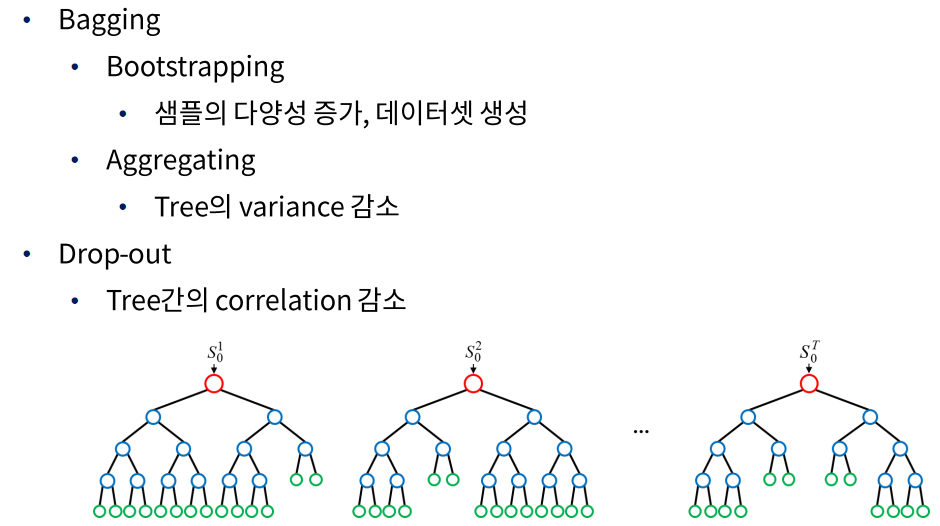

### 문제 15. [Random Forest]  Random Forest 기본 모형 만들기

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# (문제) Random Forest 모형을 만들어 rf에 저장합니다.
rf=RandomForestClassifier()

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

### 문제 16. [Random Forest] Grid Search 구축 (Loss function / Prunning / 변수 선택 / Tree 개수)

In [ ]:
# (문제) Random Forest에서 고려해야할 n_estimators, max_depth, min_samples_leaf, max_features 등을 고려하여 Grid search를 수행합니다.
# GridSearchCV의 옵션은 cv=10, n_jobs=n_thread, scoreing="accuracy"로 설정합니다.
parameters={'n_estimators':[],'min_samples_leaf':[],'max_depth':[],'z':[]}
GSRF=GridSearchCV(rf,parameters,cv=10,n_jobs=n_thread,scoring="accuracy")
GSRF.fit(x_train,y_train)

In [ ]:
print('final params',GSRF.best_params_)
print('best score',GSRF.best_score_)

### 문제 17. [Random Forest] 모형 평가 및 최적  Random Forest 구축

In [ ]:
# (문제) predict 함수를 활용하여 예측 값을 구해 이를 predicted 에 저장하고 이를 출력하며 classification_report 또한 출력합니다.
predicted=GSRF.predict(x_test)
cMatrix=confusion_matrix(y_test,predicted)
print(cMatrix)
print(metrics.classification_report(y_test,predicted))

## Step 5. Support Vector Machine

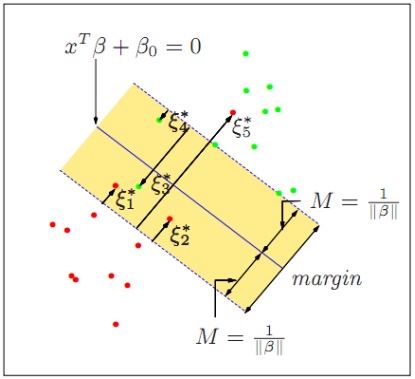

- 노란색 margin을 최대화하는 boundary를 찾는 것이 목표.
- Error를 허용하는 정도를 C로 표현한다.
 - C가 크면 Error를 많이 허용하고, C가 작을 수록 Error를 적게 허용한다.

Image reference: Fastcampus 머신러닝과 데이터 분석 A-Z 




### 문제 18. [SVM] Support Vector Machine 기본 모형 만들기

In [ ]:
from sklearn import svm

In [ ]:
# (문제) Support Vector Machine을 만들어 svc에 저장합니다.
svc=svm.SVC()

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

### 문제 19. [SVM] Grid Search 구축 (Regularization / Kernel / Gamma)

In [ ]:
# (문제) Support Vector Machine에서 고려해야할 C, kernel, gamma 등을 고려하여 Grid search를 수행합니다.
# GridSearchCV의 옵션은 cv=10, n_jobs=n_thread, scoreing="accuracy"로 설정합니다.
parameters={'C':[0.01,0.1,0.5,0.9,1,5,10],'kernel':['linear','rbf','poly'],'gamma':[0.1,1,10]}
GS_SVM=GridSearchCV(svc,parameters,cv=10,n_jobs=n_thread,scoring="accuracy")
GS_SVM.fit(x_train,y_train)

In [ ]:
print('final params',GS_SVM.best_params_)
print('best score',GS_SVM.best_score_)

### 문제 20. [SVM] 모형 평가 및 최적 Support Vector Machine 구축

In [ ]:
# (문제) predict 함수를 활용하여 예측 값을 구해 이를 predicted 에 저장하고 이를 출력하며 classification_report 또한 출력합니다.
predicted=GS_SVM.predict(x_test)
cMatrix=confusion_matrix(y_test,predicted)
print(cMatrix)
print(metrics.classification_report(y_test,predicted))

## Step 6. 신경망 모형

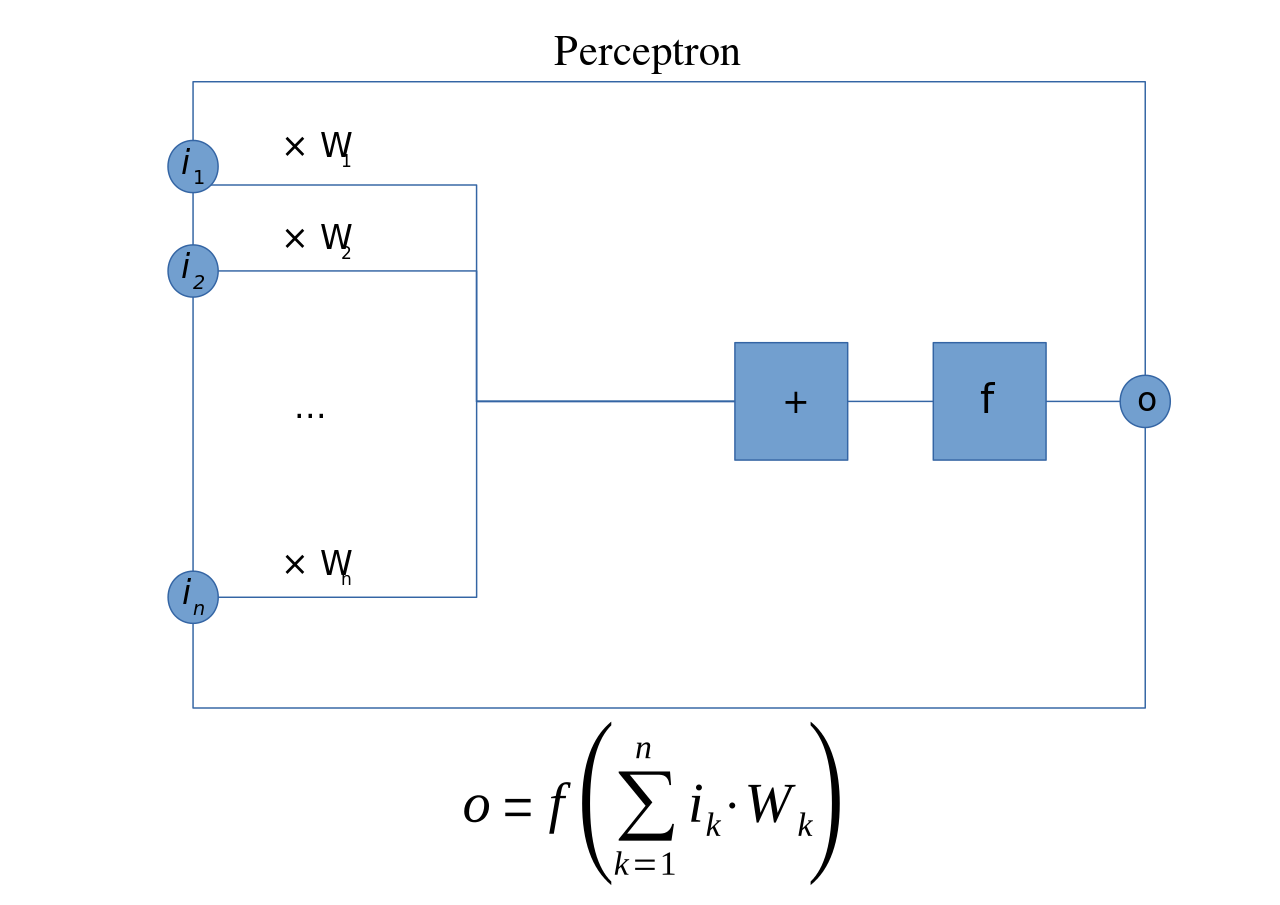

(Image reference: https://en.wikipedia.org/wiki/File:Perceptron.svg)

- 신경망 모형은 위와 같이 입력 데이터를 종합하여 결과값을 내는 구조를 가진 Perceptron을 중첩시키고 혼합시킨 구조이다. 아래와 같이 두 부분으로 나누어볼 수 있다.
 - 입력값들의 선형합 구조인 transfer function
 - activation function f()
- 이 때 입력값은 다른 perceptron의 출력값이 될 수 있으며 이것이 중첩되면 아래와 같이 나타날 수 있으며 이를 신경망 모형이라 한다.
 - Input Layer: 입력 데이터가 위치하는 layer.
 - Hidden Layer: 입력 데이터 혹은 또 다른 hidden layer의 출력값을 입력값으로 하는 perceptron이 위치하는 layer.
 - Output Layer:마지막 hidden layer의 출력값을 입력값고 출력함수의 결과를 얻은 노드로 구성된 layer.

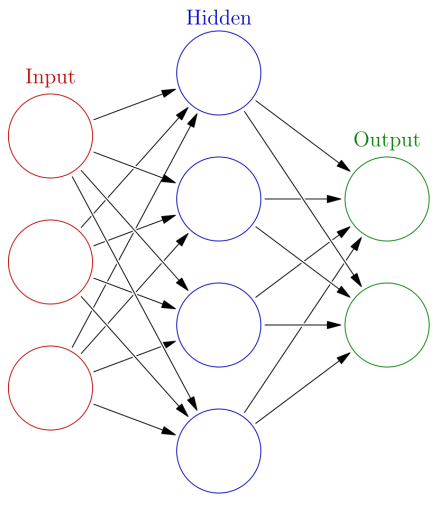

### 문제 21. [ANN] 신경망 모형  기본 모형 만들기

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
# (문제) 신경망 모형을 만들어 ann_model에 저장합니다.
nn_model=MLPClassifier(random_state=1)

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

### 문제 22. [ANN] Grid Search 구축 (Hidden Layer 수 / Hidden node 수 / Regularization)

- 히든레이어는 많은 경우 1개로도 충분함.
- 히든 노드의 수는 아래와 같은 가이드라인 또한 존재하나, grid search를 통해서 찾는 것을 추천함.

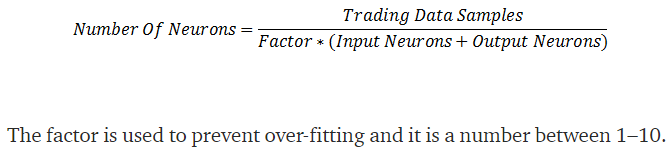

In [ ]:
x_train.shape

In [ ]:
1552/(10*(26+1))

In [ ]:
1552/(1*(26+1))

In [ ]:
# (문제) 신경망 모형에서 고려해야할 alpha, hidden_layer_sizes, activation등을 고려하여 Grid search를 수행합니다.
# GridSearchCV의 옵션은 cv=10, n_jobs=n_thread, scoreing="accuracy"로 설정합니다.
parameters={'alpha':[],'hidden_layer_sizes':[],'activation':[]}
GS_NN=GridSearchCV(nn_model,parameters,cv=10,n_jobs=n_thread,scoring="accuracy")
GS_NN.fit(x_train,y_train)

In [ ]:
print('final params', GS_NN.best_params_)
print('best score', GS_NN.best_score_)

In [ ]:
means = GS_NN.cv_results_['mean_test_score']
stds = GS_NN.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, GS_NN.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

In [ ]:
means = GS_NN.cv_results_['mean_test_score']
stds = GS_NN.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, GS_NN.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

### 문제 23. [ANN] 모형 평가 및 최적 신경망 모형 구축

In [ ]:
# (문제) predict 함수를 활용하여 예측 값을 구해 이를 predicted 에 저장하고 이를 출력하며 classification_report 또한 출력합니다.
predicted=GS_NN.predict(x_test)
cMatrix=confusion_matrix(y_test,predicted)
print(cMatrix)print(metrics.classification_report(y_test,predicted))

https://playground.tensorflow.org

## Step 7. Boosting

- 오분류된 데이터에 가중치를 더 주어 샘플링하여 이를 잘 분류하기 위한 합성 분류기를 구성하는 방법

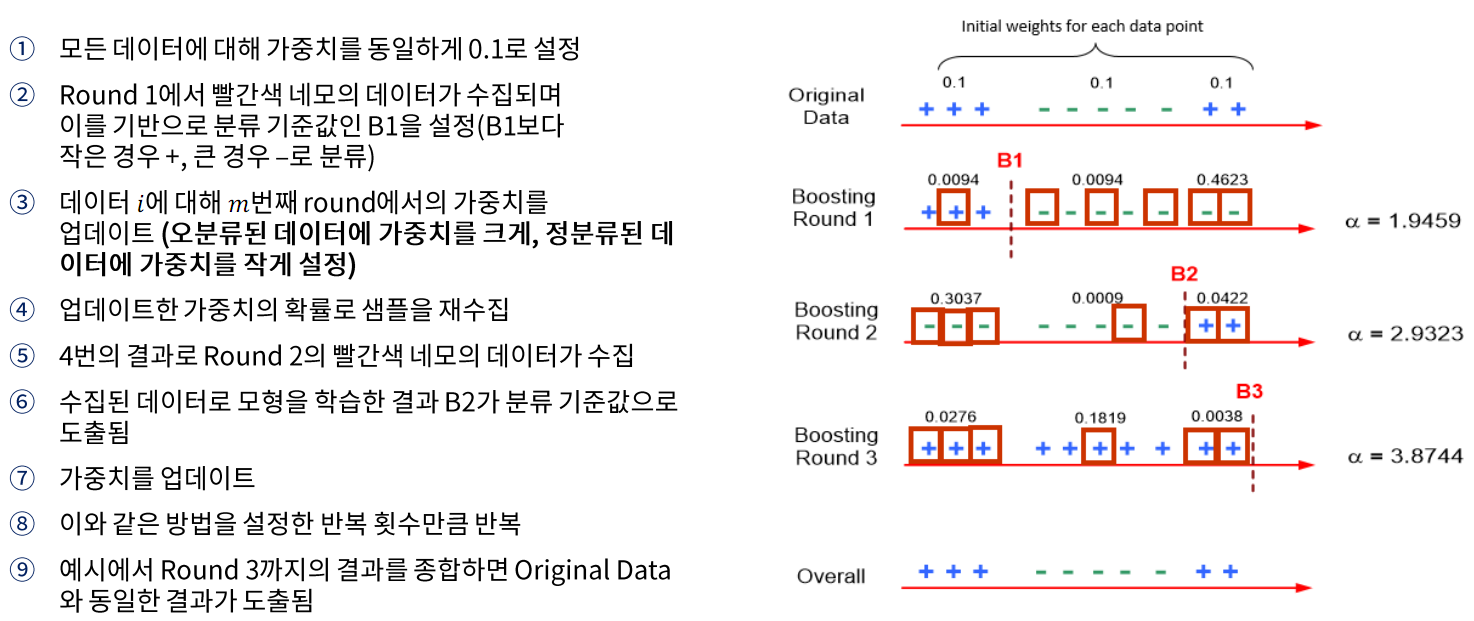

### 문제 27. [Boosting] lightGBM 기본 모형 만들기

- leaf-wise loss를 사용함. 
  - 시간과 메모리를 절약하여, fitting 속도 빠름.
  

In [ ]:
import lightgbm as lgb

In [ ]:
# (문제) lightgbm 모형을 만들어 lgbm_model에 저장합니다. objective='binary' 로 설정합니다.
lgbm_model=lgb.LGBMClassifier(objecve='binary')

https://lightgbm.readthedocs.io/en/latest/Parameters.html

###문제 28. [Boosting] lightGBM  Grid Search 구축 (Max depth / Tree 개수)

In [ ]:
# (문제) lightGBM에서 주로 고려해야할 num_leaves, min_data_in_leaf, colsample_bytree, n_estimators 등을 고려하여 Grid search를 수행합니다.
# GridSearchCV의 옵션은 cv=10, n_jobs=n_thread, scoreing="accuracy"로 설정합니다.
parameters={
    'num_leaves':[],
    'min_data_in_leaf':[],
    'colsample_bytree':[],
    'n_estimators':[]
}

In [ ]:
GS_lgbm=GridSearchCV(lgbm_model,parameters,cv=10,n_jobs=n_thread,scoring="accuracy")
GS_lgbm.fit(x_train,y_train)

https://lightgbm.readthedocs.io/en/latest/Parameters-Tuning.html

In [ ]:
print('final params',GS_lgbm.best_params_)
print('best score',GS_lgbm.best_score_)

### 문제 29. [Boosting] 모형 평가 및 최적 lightGBM 모형 구축

In [ ]:
# (문제) predict 함수를 활용하여 예측 값을 구해 이를 predicted 에 저장하고 이를 출력하며 classification_report 또한 출력합니다.
predicted=GS_lgbm.predict(x_test)
cMatrix=confusion_matrix(y_test,predicted)
print(cMatrix)
print(metrics.classification_report(y_test,predicted))

## 요약
- 학습한 것:
 - 기초 학습 내용은 각 모델들의 구축과정, 이 파라미터를 최적화 시키는 GridSearch에 대한 활용임. 모델 방법론에 대한 개괄적 이해를 바탕으로 한 적정한 모델의 선택과 파라미터를 최적화 시키는 관점에서 바라보고 이해하는 것. 

- 본 강의의 활용:
 - 모형 별 중요 파라미터와 이 파라미터들이 가지는 의미, 파라미터들의 변화에 따른 예측력의 변화 경향성을 바탕으로 여러 데이터에서 데이터의 특성에 따른 모델의 성능과 최적 파라미터가 가지는 경향성을 경험적으로 익히는 것이 필요함.
